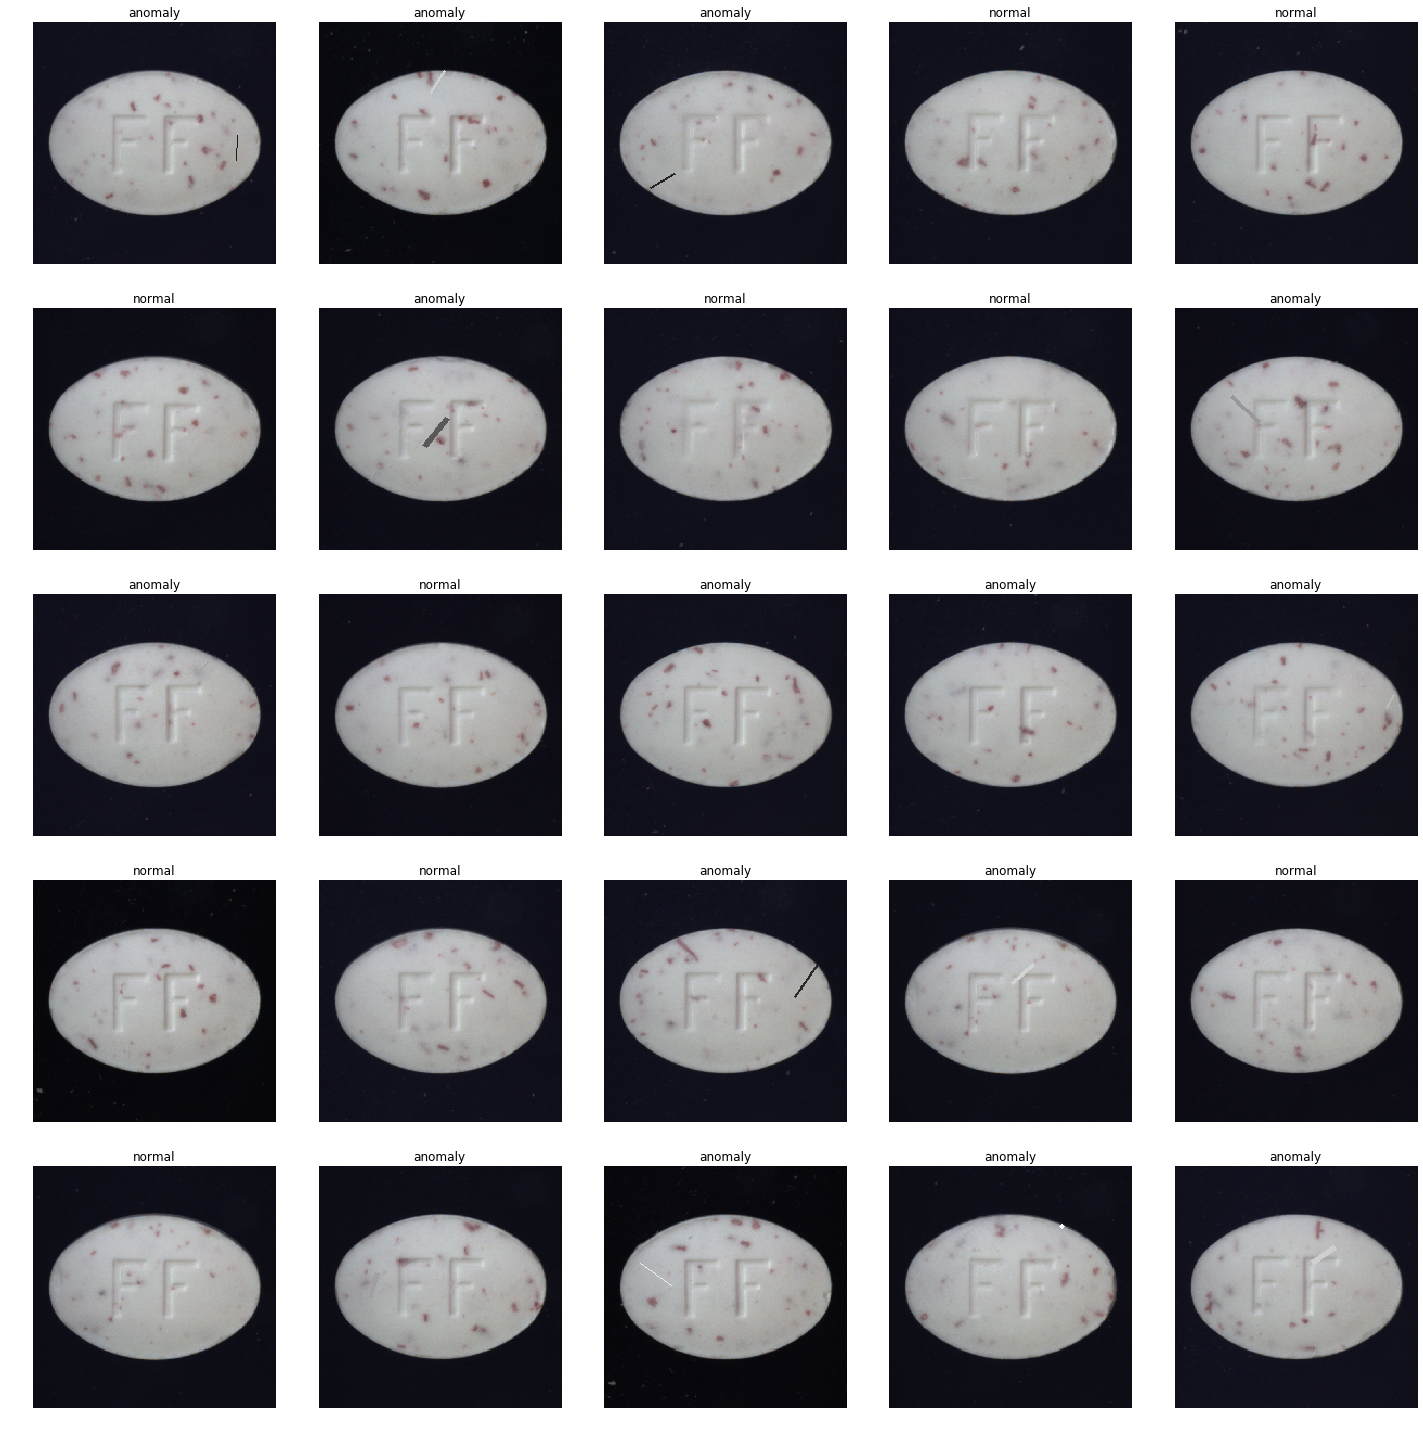

In [6]:
import sys; sys.path.append('..')
from mvtecad_test import *
from fastai.callbacks import SaveModelCallback
from PIL import ImageFilter

fastai_progress_as_text()

VISUALIZE = True
PATH = Path('/mnt/dataset/mvtec_ad')


mvtecad = MVTecADTest(PATH, artificial_image_list_cls=DefectOnBlobImageList,
                      testcases = ['pill',])#, skip_data_creation=True)
DefectOnBlobImageList.set_params(blob_th=20, width_min=1, width_max=5, length=30, color=False)

mvtecad.set_test(0, 0)
data = mvtecad.databunch()
data.show_batch()

In [ ]:
def learner_ArcFace(data):
    learn = cnn_learner(data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(10, max_lr=1e-2)
    learn.fit_one_cycle(10, max_lr=1e-4)
    learn.unfreeze()
    learn.fit_one_cycle(20, max_lr=slice(1e-6, 1e-4), callbacks=[SaveModelCallback(learn)])
    return learn

model_defs = {
    'ArcFace': learner_ArcFace,
}

for name, learner_fn in model_defs.items():
    for i, tc in enumerate(mvtecad.testcases):
        mvtecad.set_test(i, 0)
        mvtecad.test(name, learner_fn, vis_class=None)


In [18]:
paper_table2_compatible_result(mvtecad, reorder=False)

,ArcFace
index,
pill-TPR,0.907801
pill-TNR,0.846154
